# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import time
import os
import kagglehub
import tensorflow
from tensorflow import keras
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.layers import BatchNormalization, Dense, Dropout, Activation
from keras.models import Sequential
from keras.regularizers import l2
import itertools
import warnings
from statsmodels.graphics.mosaicplot import mosaic

2025-11-30 01:17:54.377199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764465474.400343   10517 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764465474.407245   10517 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
warnings.filterwarnings("ignore")


In [3]:
np.random.seed(41)

In [4]:
random_seed = 240217

In [5]:
# Download dataset
path = kagglehub.dataset_download("arashnic/taxi-pricing-with-mobility-analytics")
print("Dataset was downloaded to:", path)

# Find the CSV file inside the downloaded folder
csv_path = os.path.join(path, "sigma_cabs.csv")

# Load the dataframe
df = pd.read_csv(csv_path)


df['Surge_Pricing_Type'] = df['Surge_Pricing_Type'].astype('category')

df.head()


Dataset was downloaded to: /kaggle/input/taxi-pricing-with-mobility-analytics


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Trip_ID                      131662 non-null  object  
 1   Trip_Distance                131662 non-null  float64 
 2   Type_of_Cab                  111452 non-null  object  
 3   Customer_Since_Months        125742 non-null  float64 
 4   Life_Style_Index             111469 non-null  float64 
 5   Confidence_Life_Style_Index  111469 non-null  object  
 6   Destination_Type             131662 non-null  object  
 7   Customer_Rating              131662 non-null  float64 
 8   Cancellation_Last_1Month     131662 non-null  int64   
 9   Var1                         60632 non-null   float64 
 10  Var2                         131662 non-null  int64   
 11  Var3                         131662 non-null  int64   
 12  Gender                       131662 non-null

In [7]:
df.head(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [8]:
df.describe(include='all')

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
count,131662,131662.000000,111452,125742.000000,111469.000000,111469,131662,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662,131662.0
unique,131662,NaN,5,NaN,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2,3.0
top,T0005908514,NaN,B,NaN,NaN,B,A,NaN,NaN,NaN,NaN,NaN,Male,2.0
freq,1,NaN,31136,NaN,NaN,40355,77597,NaN,NaN,NaN,NaN,NaN,93900,56728.0
mean,NaN,44.200909,NaN,6.016661,2.802064,NaN,NaN,2.849458,0.782838,64.202698,51.202800,75.099019,NaN,NaN
std,NaN,25.522882,NaN,3.626887,0.225796,NaN,NaN,0.980675,1.037559,21.820447,4.986142,11.578278,NaN,NaN
min,NaN,0.310000,NaN,0.000000,1.596380,NaN,NaN,0.001250,0.000000,30.000000,40.000000,52.000000,NaN,NaN
25%,NaN,24.580000,NaN,3.000000,2.654730,NaN,NaN,2.152500,0.000000,46.000000,48.000000,67.000000,NaN,NaN
50%,NaN,38.200000,NaN,6.000000,2.798050,NaN,NaN,2.895000,0.000000,61.000000,50.000000,74.000000,NaN,NaN
75%,NaN,60.730000,NaN,10.000000,2.946780,NaN,NaN,3.582500,1.000000,80.000000,54.000000,82.000000,NaN,NaN


In [9]:
df_nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Number of Missing Values'])
df_nulls['% Missing'] = df.isnull().sum().sort_values(ascending=False)/len(df)* 100
df_nulls

,Number of Missing Values,% Missing
Var1,71030,53.948748
Type_of_Cab,20210,15.349911
Confidence_Life_Style_Index,20193,15.336999
Life_Style_Index,20193,15.336999
Customer_Since_Months,5920,4.496362
Trip_Distance,0,0.000000
Trip_ID,0,0.000000
Destination_Type,0,0.000000
Customer_Rating,0,0.000000
Cancellation_Last_1Month,0,0.000000


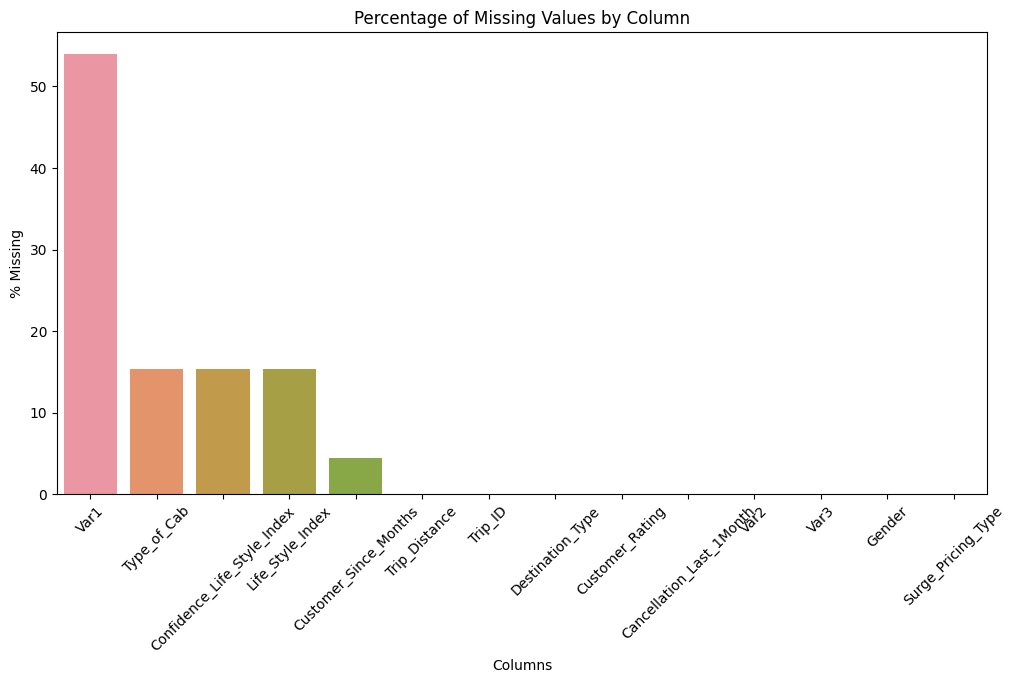

In [10]:
# Creating a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df_nulls.index, y='% Missing', data=df_nulls)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

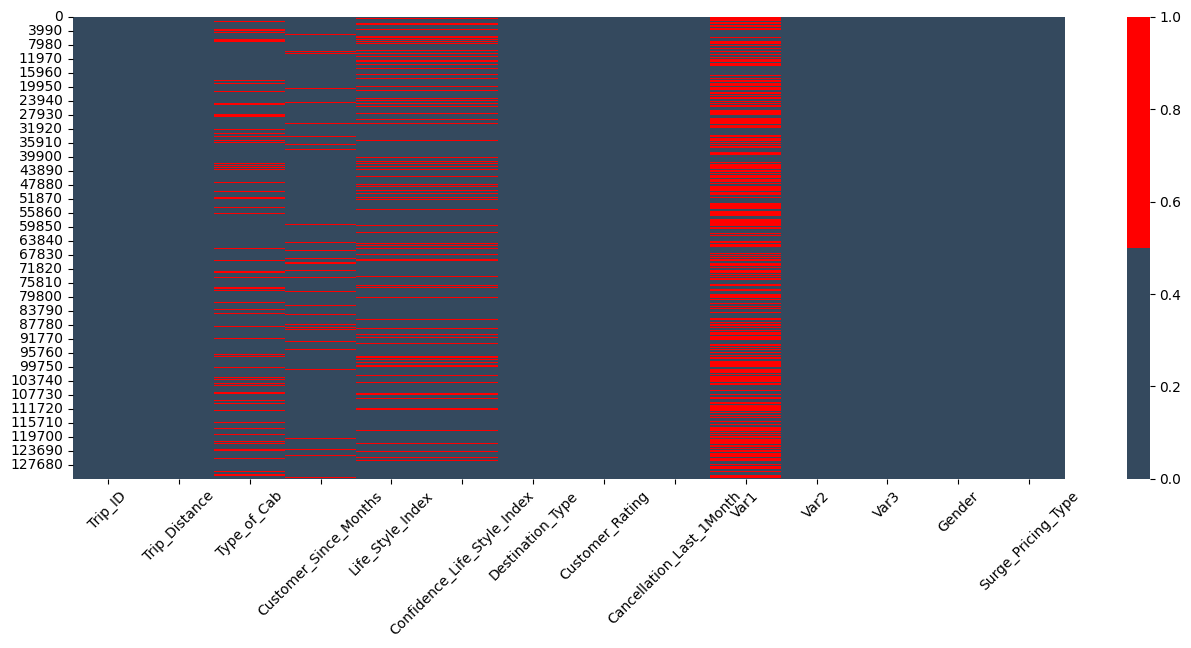

In [11]:
plt.figure(figsize=(16,6))

colours = ['#34495E', 'red']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
plt.xticks(rotation=45)
plt.show()

<Figure size 2200x1200 with 0 Axes>

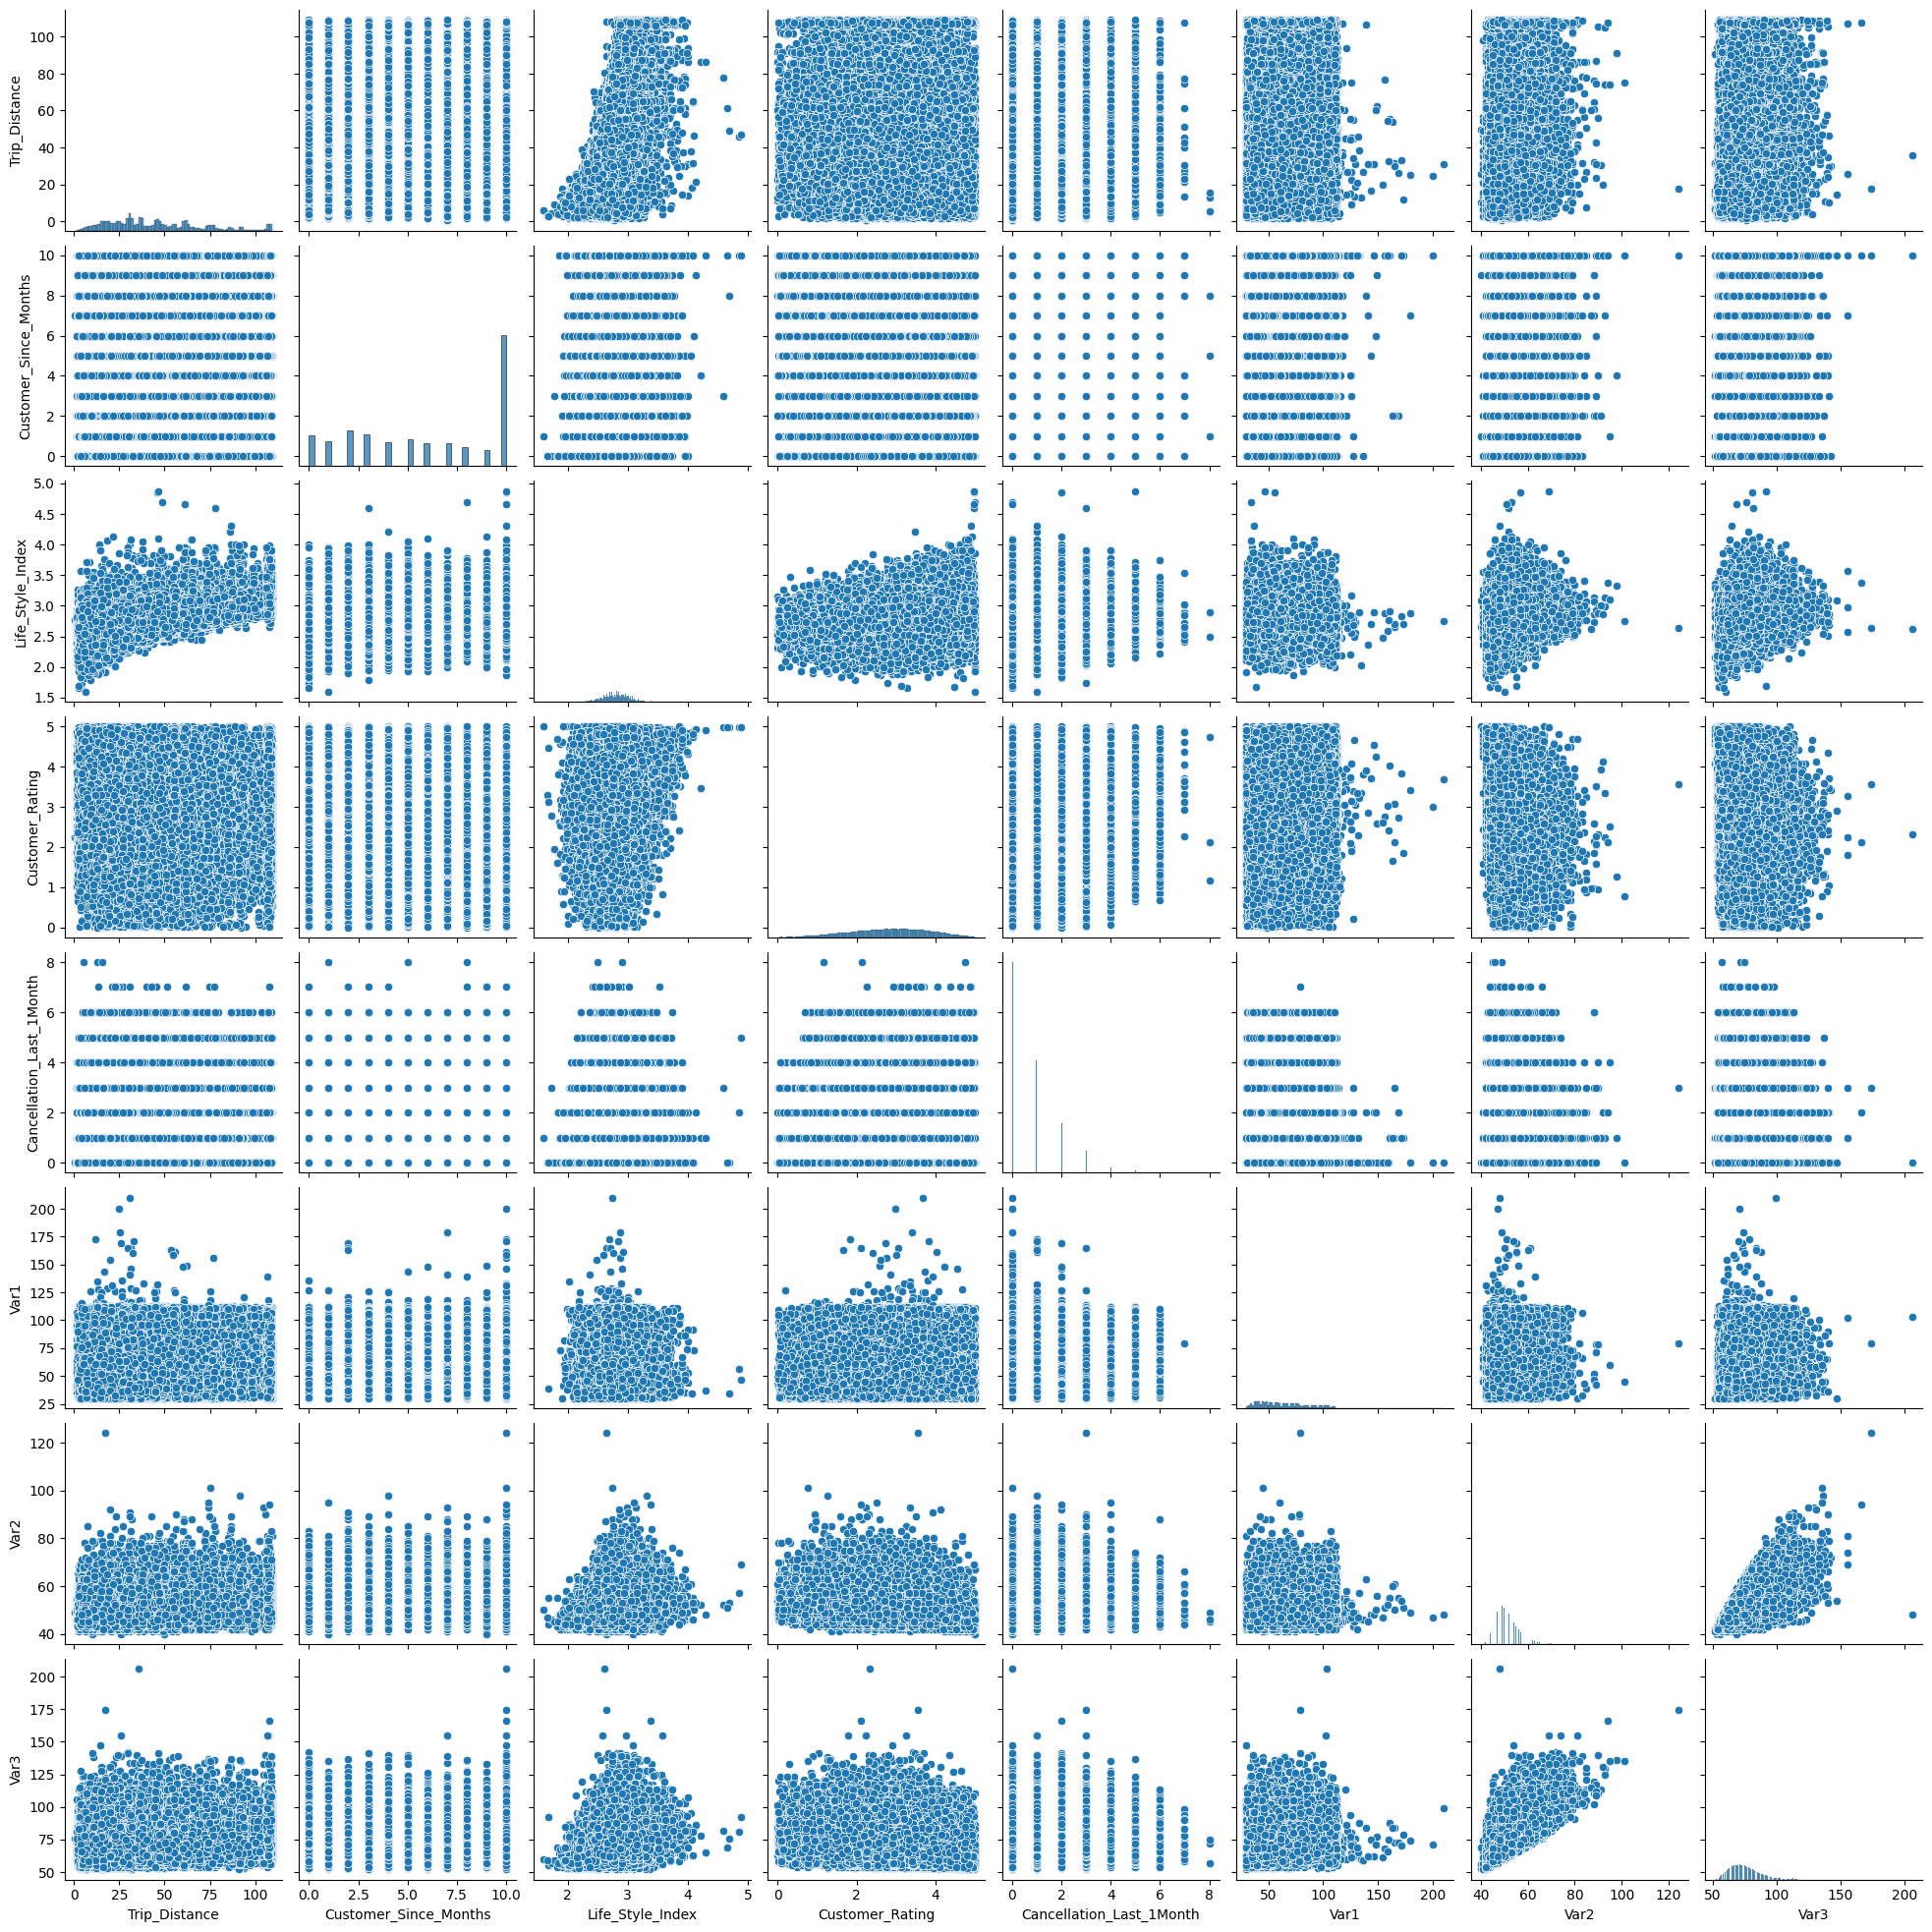

In [12]:
plt.figure(figsize=(22,12))
sns.pairplot(df)
plt.show()

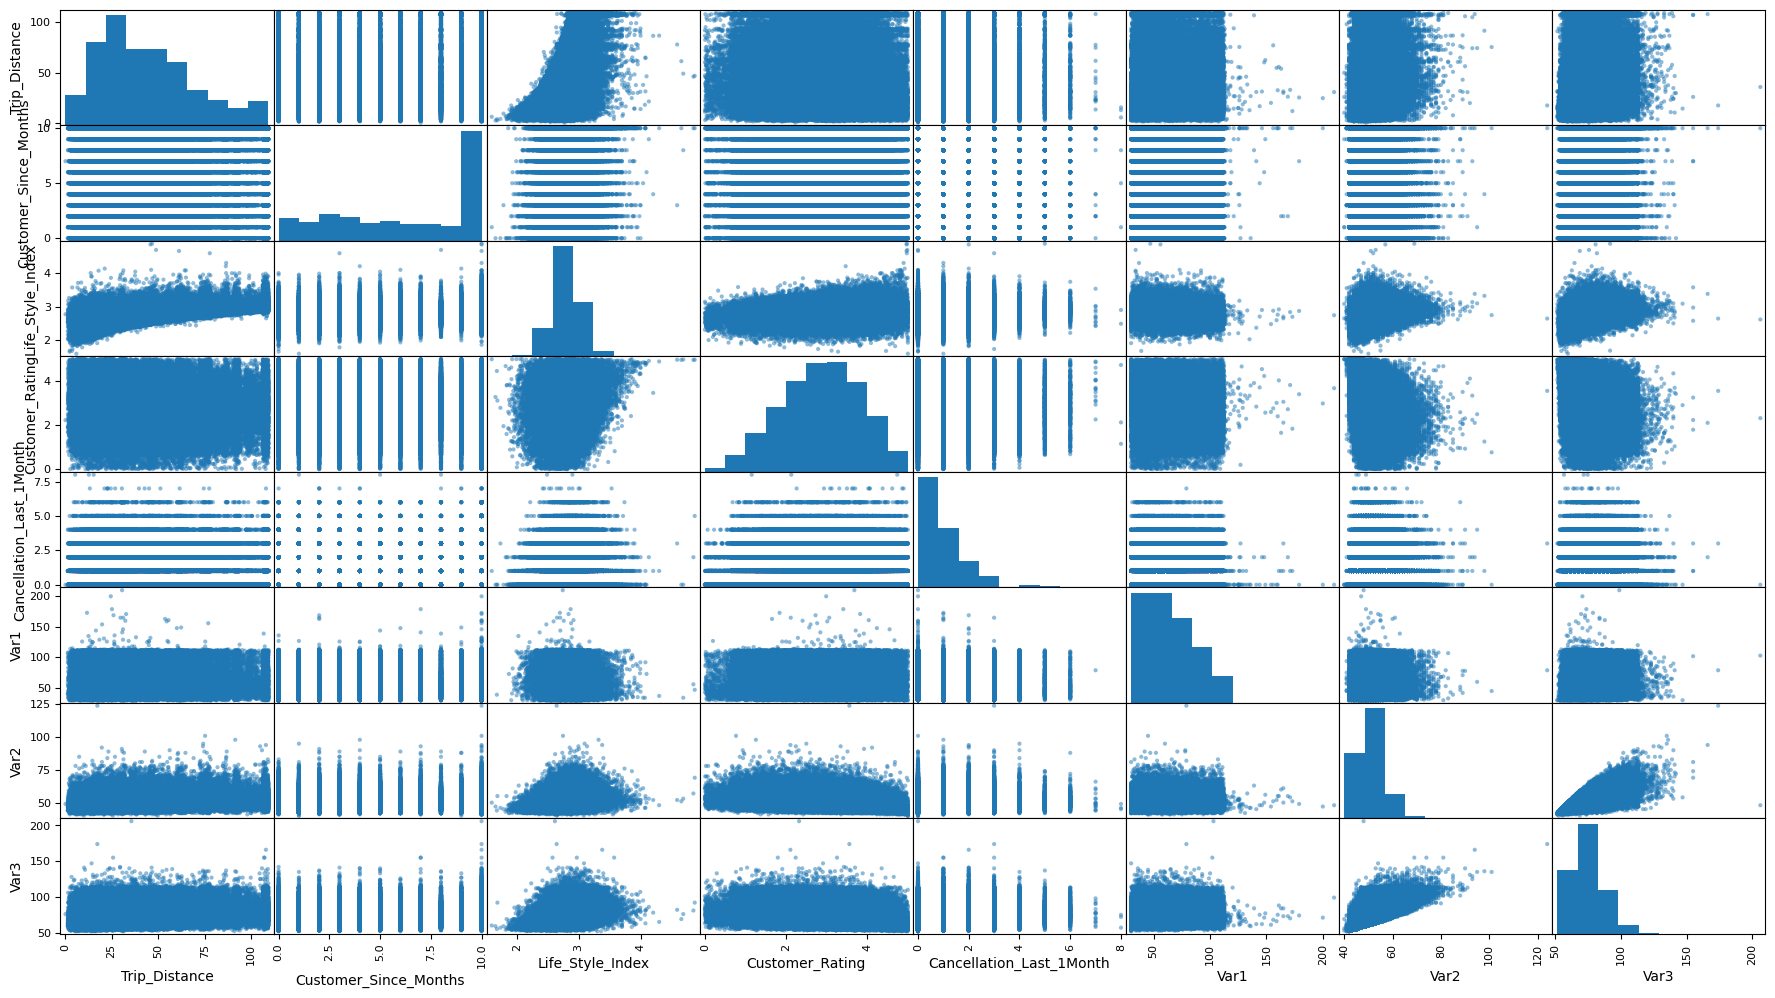

In [13]:
pd.plotting.scatter_matrix(df, alpha=0.5,figsize=(22,12))

plt.show()

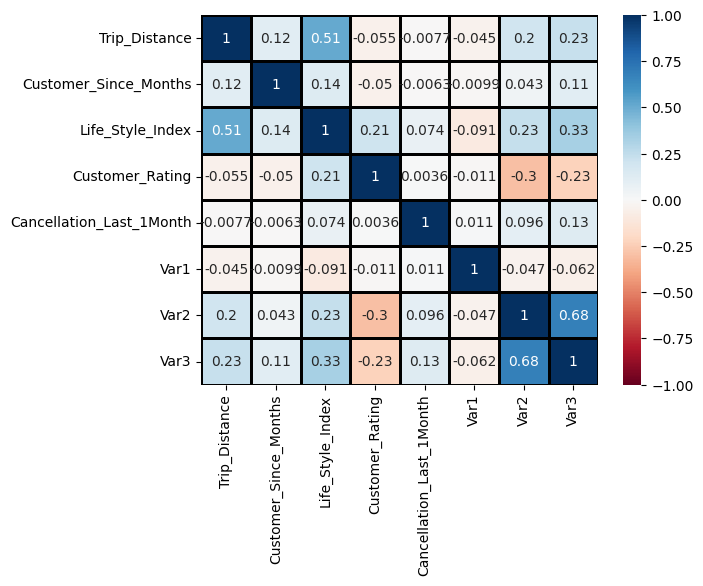

In [14]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), cmap='RdBu', vmin=-1, vmax=1, linewidth=1, linecolor='black', annot=True)
plt.show()

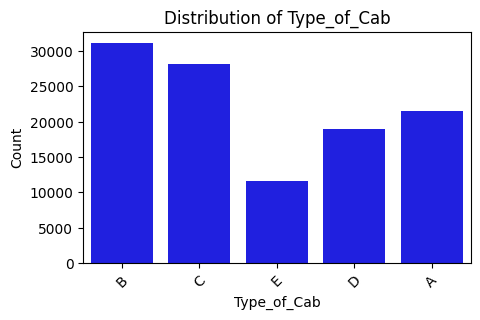

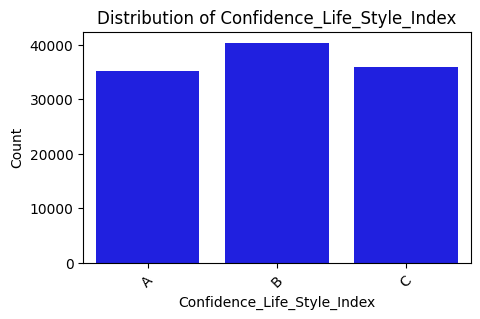

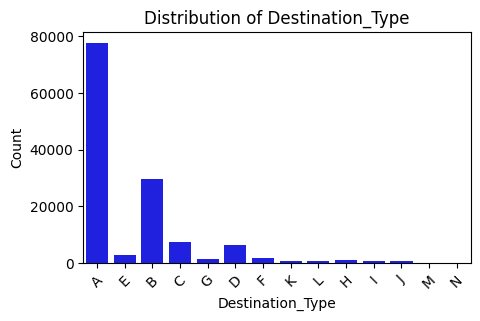

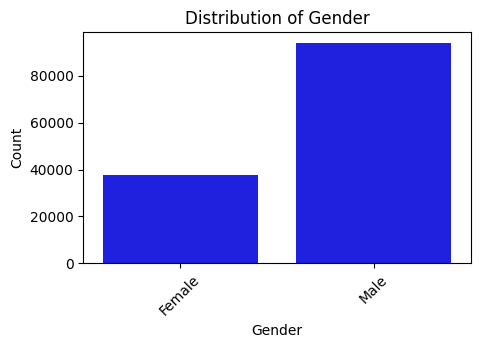

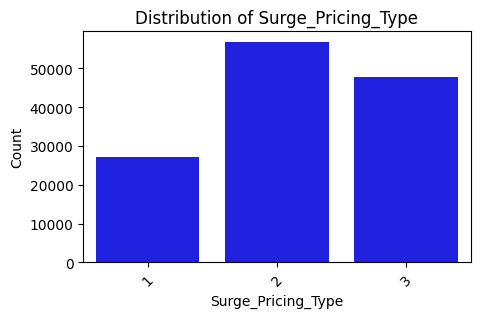

In [15]:
categorical_variables = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender','Surge_Pricing_Type']

# Ploting histograms for each continuous variable
for variable in categorical_variables:
    plt.figure(figsize=(5, 3))  # Adjusting the size as needed
    sns.countplot(x=variable, data=df, color='blue')
    plt.title(f'Distribution of {variable}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotating x labels for better readability
    plt.show()


In [16]:
# Defining the categorical and continuous variables
categorical_vars = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender', 'Surge_Pricing_Type']
continuous_vars = ['Trip_Distance','Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']

# Function to perform ANOVA using statsmodels
def anova_statsmodels(data, cont_var, cat_var):
    formula = f"{cont_var} ~ C({cat_var})"
    model = ols(formula, data=data).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    return anova_results

# Function to perform Chi-Squared test
def chi_squared_test(data, cat_var1, cat_var2):
    contingency_table = pd.crosstab(data[cat_var1], data[cat_var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p

# Performing ANOVA for each pair of a categorical and a continuous variable
for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        try:
            result = anova_statsmodels(df, cont_var, cat_var)
            p_value = result["PR(>F)"][0]
            dependency = "dependent" if p_value < 0.05 else "independent"
            print(f"ANOVA for {cat_var} and {cont_var}: The variables are {dependency} (p-value = {p_value}).")
        except Exception as e:
            print(f"Could not perform ANOVA for {cat_var} and {cont_var}: {e}")

# Performing Chi-Squared test for each pair of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        chi2, p = chi_squared_test(df, categorical_vars[i], categorical_vars[j])
        dependency = "dependent" if p < 0.05 else "independent"
        print(f"Chi-Squared test for {categorical_vars[i]} and {categorical_vars[j]}: The variables are {dependency} (p-value = {p}).")


ANOVA for Type_of_Cab and Trip_Distance: The variables are dependent (p-value = 1.658723349454301e-225).
ANOVA for Type_of_Cab and Customer_Since_Months: The variables are dependent (p-value = 0.0017099284219558196).
ANOVA for Type_of_Cab and Life_Style_Index: The variables are dependent (p-value = 8.000964478779548e-134).
ANOVA for Type_of_Cab and Customer_Rating: The variables are dependent (p-value = 2.0344770264109034e-282).
ANOVA for Type_of_Cab and Cancellation_Last_1Month: The variables are dependent (p-value = 7.869825728975572e-285).
ANOVA for Type_of_Cab and Var1: The variables are dependent (p-value = 7.13040131755329e-05).
ANOVA for Type_of_Cab and Var2: The variables are dependent (p-value = 9.850702957082609e-05).
ANOVA for Type_of_Cab and Var3: The variables are dependent (p-value = 1.6265732296495408e-28).
ANOVA for Confidence_Life_Style_Index and Trip_Distance: The variables are dependent (p-value = 0.0).
ANOVA for Confidence_Life_Style_Index and Customer_Since_Months:

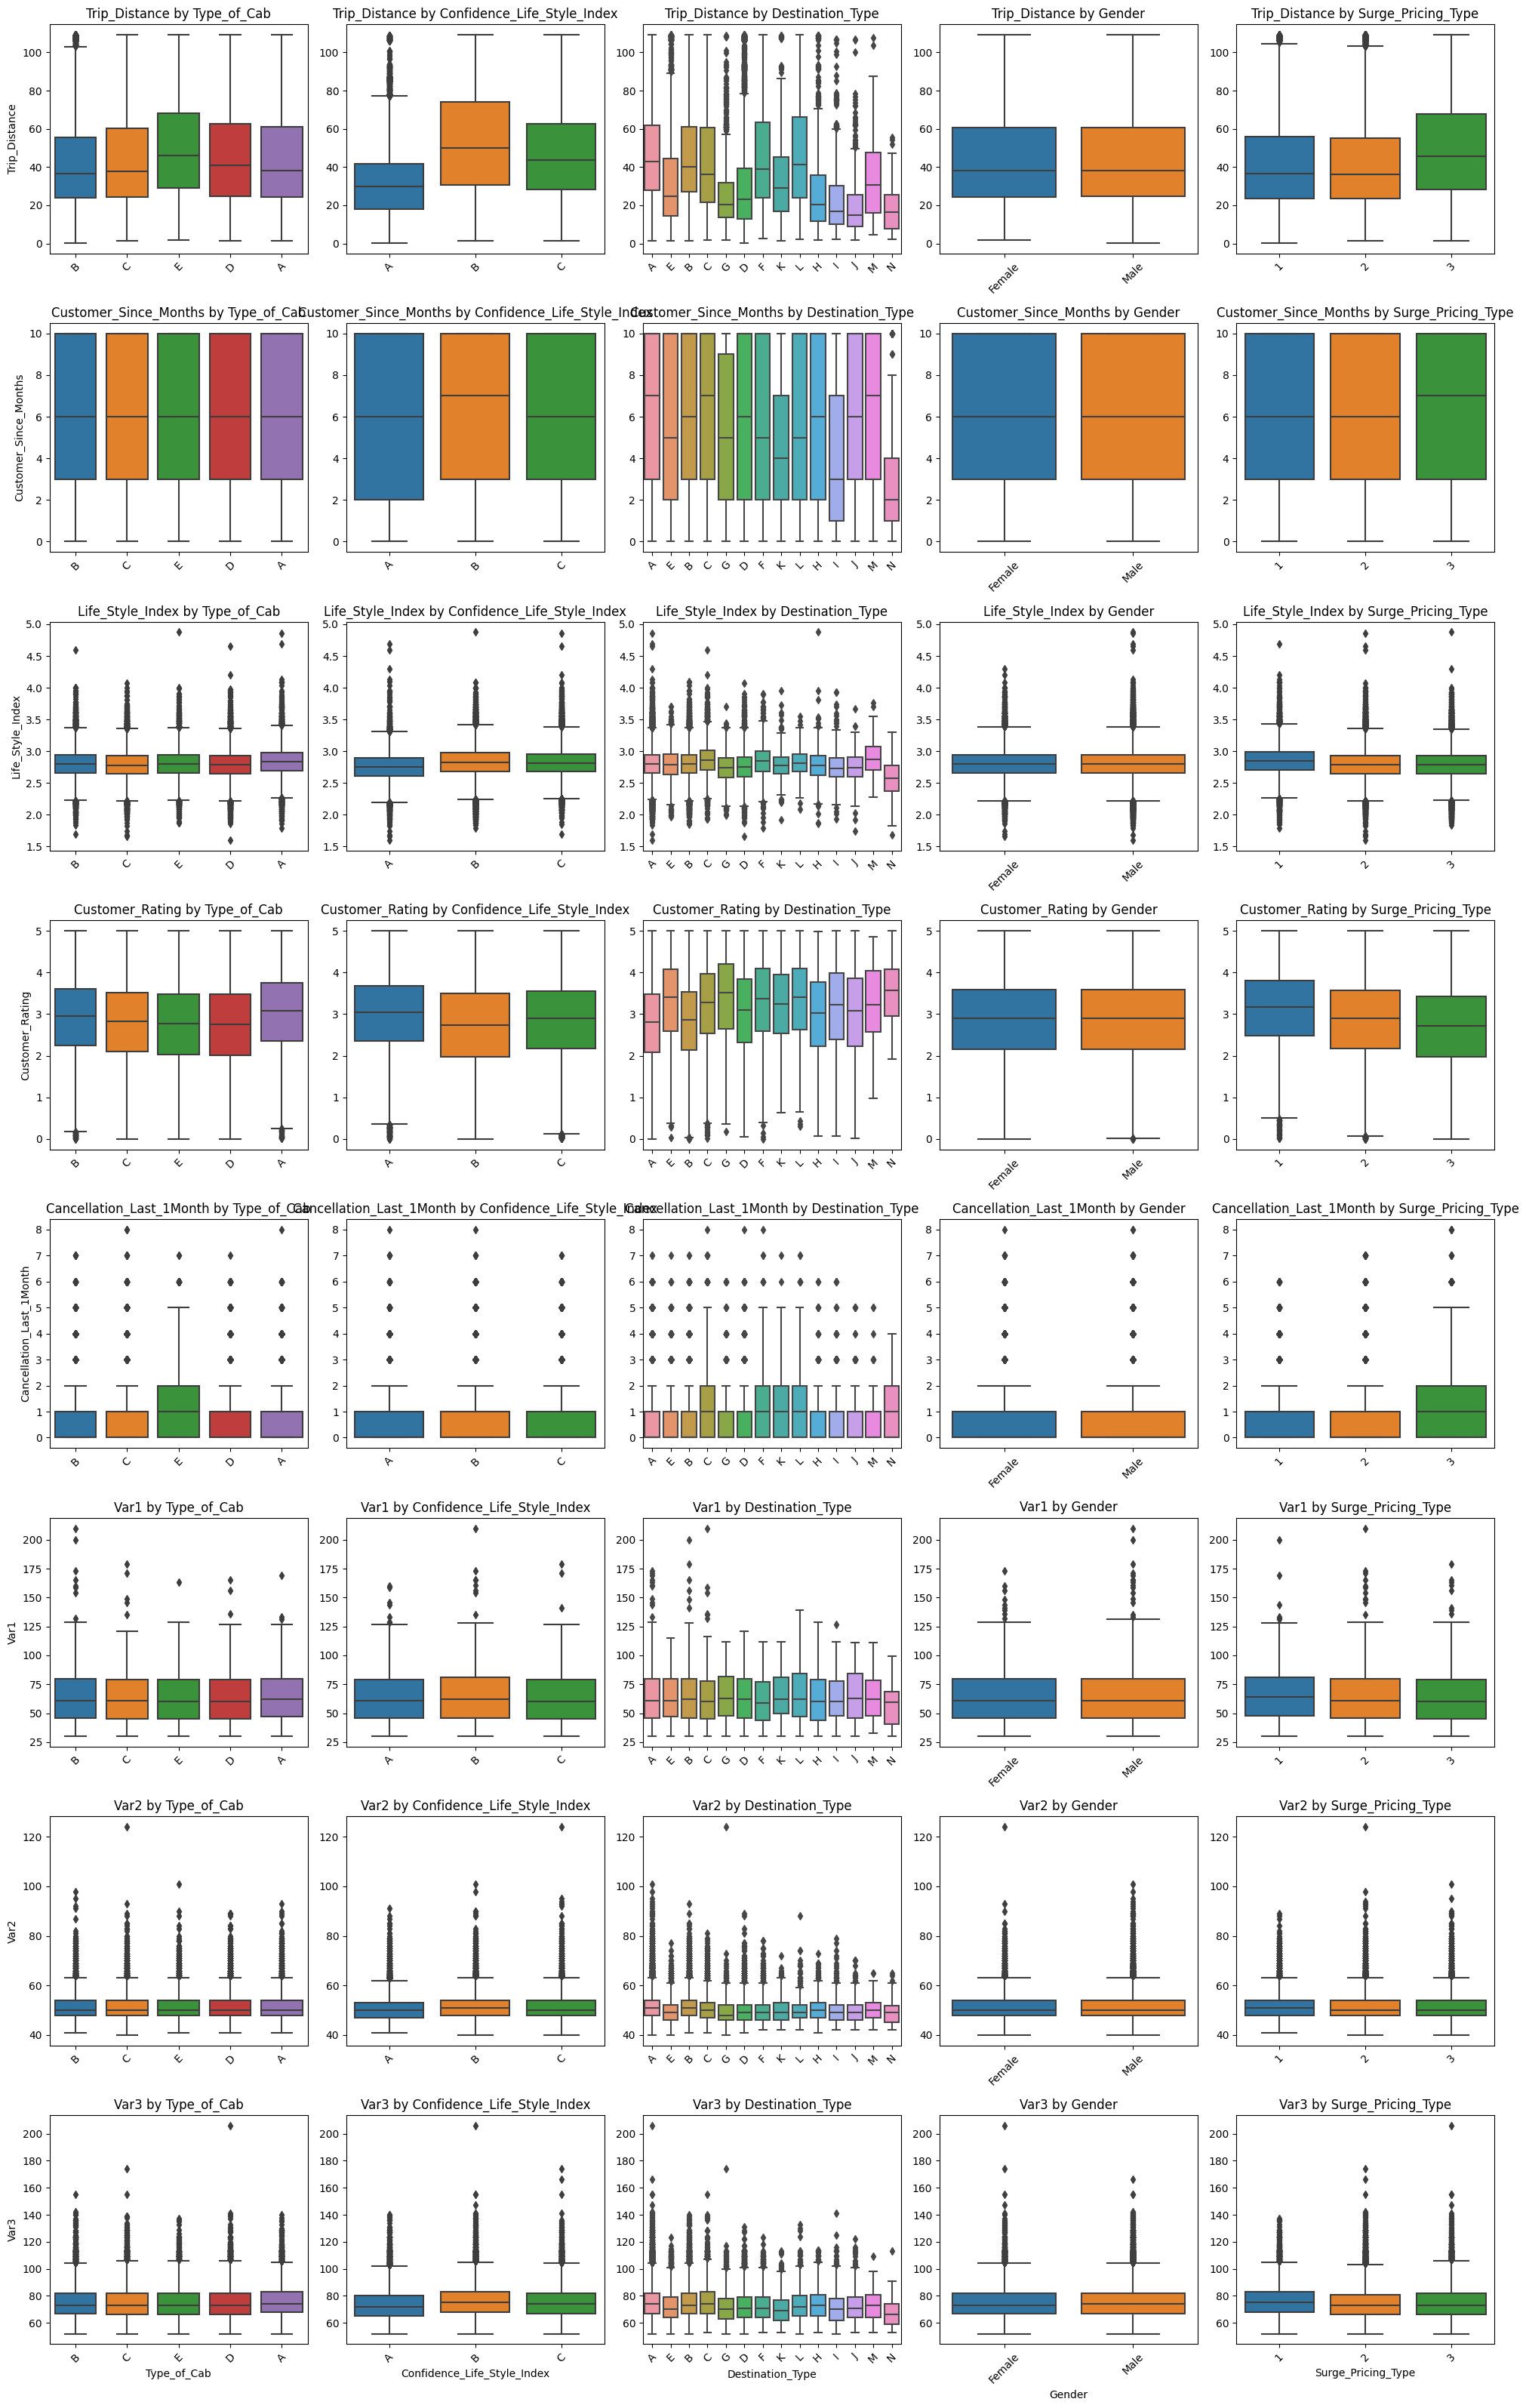

In [17]:
categorical_vars = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender', 'Surge_Pricing_Type']
continuous_vars = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']

# Calculate the number of rows and columns we need for our subplot grid
n_rows = len(continuous_vars)
n_cols = len(categorical_vars)

# Set the figure size
plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, cont_var in enumerate(continuous_vars, 1):  # Start enumerating from 1 for subplot index calculation
    for j, cat_var in enumerate(categorical_vars):
        plt.subplot(n_rows, n_cols, (i-1)*n_cols + j + 1)  # Calculate subplot index
        sns.boxplot(x=cat_var, y=cont_var, data=df)
        plt.title(f'{cont_var} by {cat_var}')
        plt.xticks(rotation=45)
        # Only show x-axis labels for the bottom row and y-axis labels for the leftmost column to avoid clutter
        if i != n_rows: plt.xlabel('')
        if j != 0: plt.ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


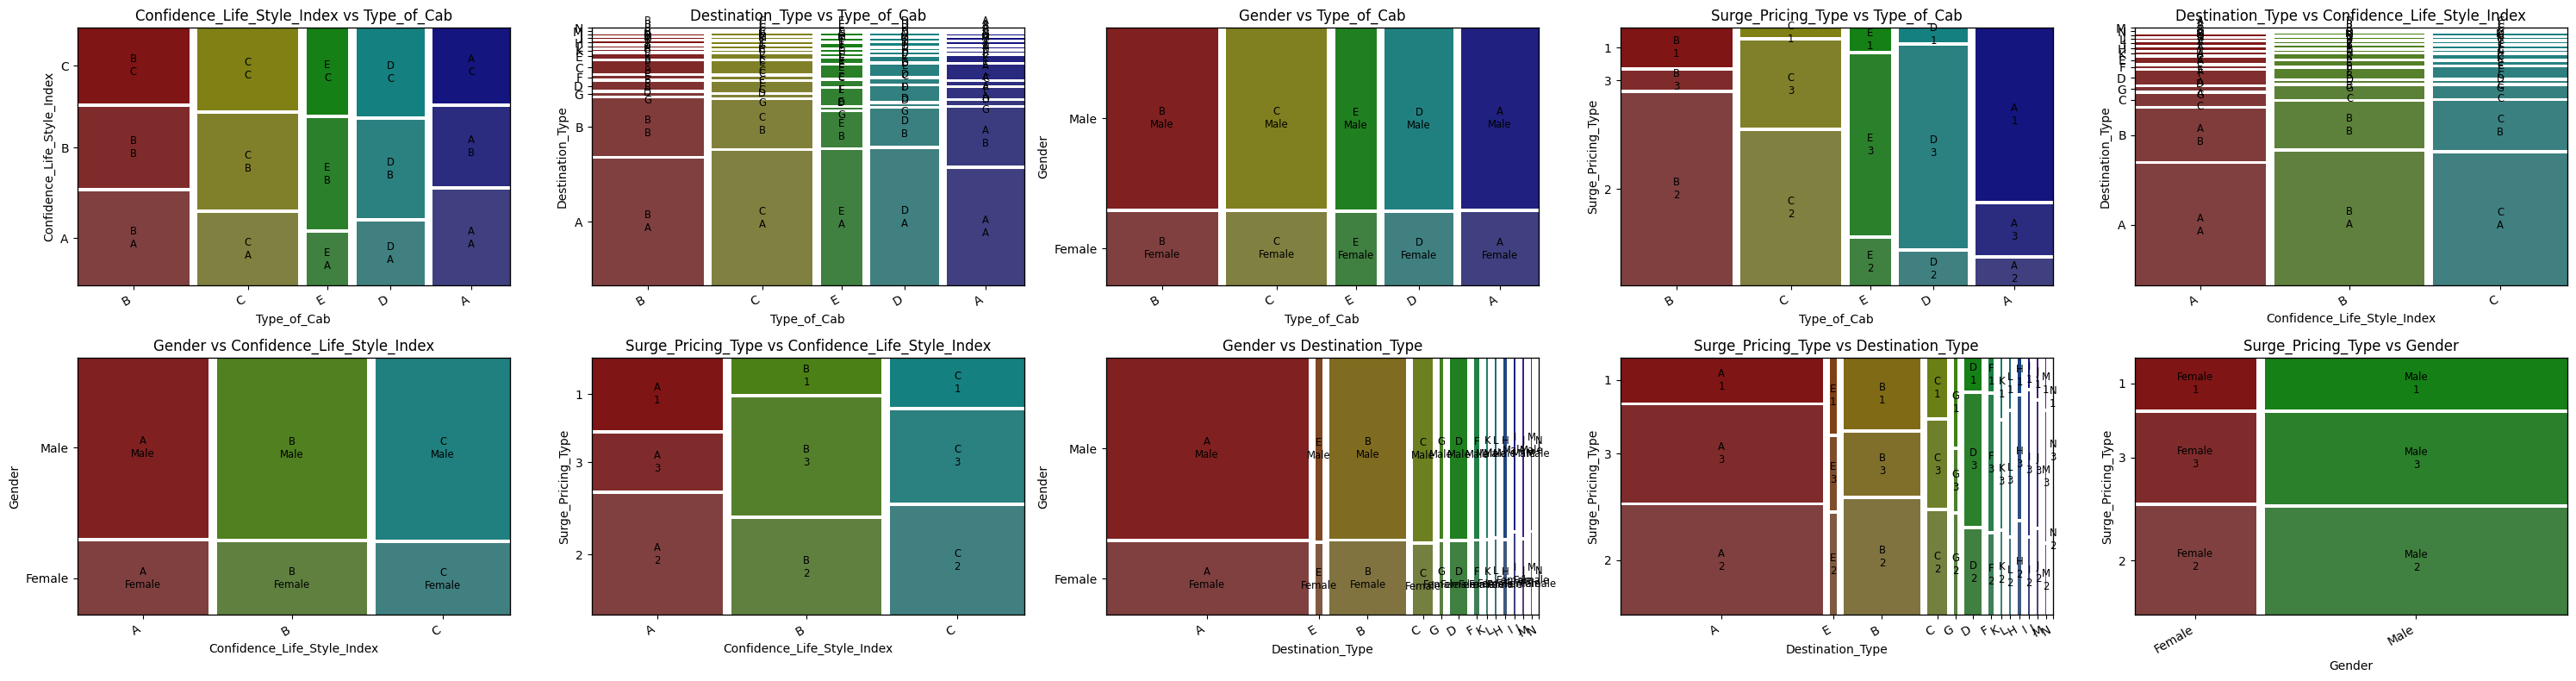

In [18]:
categorical_vars = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender', 'Surge_Pricing_Type']

# Preparing the combinations
categorical_pairs = list(itertools.combinations(categorical_vars, 2))
n_pairs = len(categorical_pairs)

# Calculating the number of rows and columns for the grid
n_cols = len(categorical_vars)  # Max columns could be the number of categorical variables
n_rows = n_pairs // n_cols + (n_pairs % n_cols > 0)  # Calculating rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))  # Adjusting the figure size as necessary
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjusting space between plots

# Flattening the axis array for easy indexing
axs = axs.flatten()

for i, pair in enumerate(categorical_pairs):
    ax = axs[i]
    mosaic(df, [*pair], ax=ax, gap=0.02)
    ax.set_title(f'{pair[1]} vs {pair[0]}')
    # Using the set_xlabel and set_ylabel to label the axes
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    # Rotating x-axis labels if necessary
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Hiding any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


# Data preparation

In [19]:
# Clean data
df = df.drop(columns=['Trip_ID', 'Var1'])

In [20]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']
feature_names = X.columns
dtypes = X.dtypes  # Store the original data types

# Convert X to numpy array
X = X.values
y = y.values

# Splitting the data with stratifing to preserve the target distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

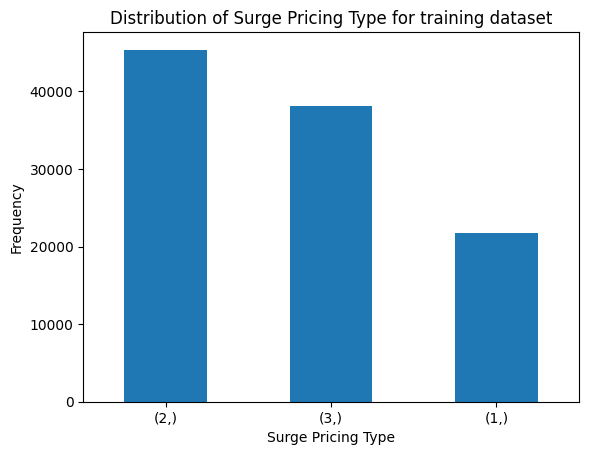

In [21]:
y_train_df = pd.DataFrame(y_train)
# Counting the occurrences of each category in 'Surge_Pricing_Type'
value_counts_y = y_train_df.value_counts()

# Plotting the distribution of 'Surge_Pricing_Type'
value_counts_y.plot(kind='bar')
plt.title('Distribution of Surge Pricing Type for training dataset')
plt.xlabel('Surge Pricing Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating X-axis labels to show them horizontally
plt.show()

In [22]:
# When converting back to DataFrame, apply the original data types
X_train_df = pd.DataFrame(X_train, columns=feature_names).astype(dtypes)
X_test_df = pd.DataFrame(X_test, columns=feature_names).astype(dtypes)

In [23]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105329 entries, 0 to 105328
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                105329 non-null  float64
 1   Type_of_Cab                  89147 non-null   object 
 2   Customer_Since_Months        100642 non-null  float64
 3   Life_Style_Index             89143 non-null   float64
 4   Confidence_Life_Style_Index  89143 non-null   object 
 5   Destination_Type             105329 non-null  object 
 6   Customer_Rating              105329 non-null  float64
 7   Cancellation_Last_1Month     105329 non-null  int64  
 8   Var2                         105329 non-null  int64  
 9   Var3                         105329 non-null  int64  
 10  Gender                       105329 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 8.8+ MB


In [24]:
# 1. Substitute all missing values in 'Type_of_Cab' and 'Confidence_Life_Style_Index' with the mode
for column in ['Type_of_Cab', 'Confidence_Life_Style_Index']:
    mode_value = X_train_df[column].mode()[0]
    X_train_df[column].fillna(mode_value, inplace=True)
    X_test_df[column].fillna(mode_value, inplace=True)

# 2. Substitute all missing values in 'Life_Style_Index' with the mean
mean_value = X_train_df['Life_Style_Index'].mean()
X_train_df['Life_Style_Index'].fillna(mean_value, inplace=True)
X_test_df['Life_Style_Index'].fillna(mean_value, inplace=True)

# 3. Substitute all missing values in 'Customer_Since_Months' with the median
median_value = X_train_df['Customer_Since_Months'].median()
X_train_df['Customer_Since_Months'].fillna(median_value, inplace=True)
X_test_df['Customer_Since_Months'].fillna(median_value, inplace=True)

In [25]:
# There are no missing values now
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105329 entries, 0 to 105328
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                105329 non-null  float64
 1   Type_of_Cab                  105329 non-null  object 
 2   Customer_Since_Months        105329 non-null  float64
 3   Life_Style_Index             105329 non-null  float64
 4   Confidence_Life_Style_Index  105329 non-null  object 
 5   Destination_Type             105329 non-null  object 
 6   Customer_Rating              105329 non-null  float64
 7   Cancellation_Last_1Month     105329 non-null  int64  
 8   Var2                         105329 non-null  int64  
 9   Var3                         105329 non-null  int64  
 10  Gender                       105329 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 8.8+ MB


In [26]:
# There are no missing values now
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26333 entries, 0 to 26332
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                26333 non-null  float64
 1   Type_of_Cab                  26333 non-null  object 
 2   Customer_Since_Months        26333 non-null  float64
 3   Life_Style_Index             26333 non-null  float64
 4   Confidence_Life_Style_Index  26333 non-null  object 
 5   Destination_Type             26333 non-null  object 
 6   Customer_Rating              26333 non-null  float64
 7   Cancellation_Last_1Month     26333 non-null  int64  
 8   Var2                         26333 non-null  int64  
 9   Var3                         26333 non-null  int64  
 10  Gender                       26333 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.2+ MB


In [27]:
X_train_df.describe(include='all')

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender
count,105329.000000,105329,105329.000000,105329.000000,105329,105329,105329.000000,105329.000000,105329.000000,105329.000000,105329
unique,NaN,5,NaN,NaN,3,14,NaN,NaN,NaN,NaN,2
top,NaN,B,NaN,NaN,B,A,NaN,NaN,NaN,NaN,Male
freq,NaN,41105,NaN,NaN,48422,62167,NaN,NaN,NaN,NaN,75044
mean,44.196044,NaN,6.015494,2.801640,NaN,NaN,2.848231,0.783327,51.202850,75.101985,NaN
std,25.508285,NaN,3.546257,0.207675,NaN,NaN,0.981344,1.039390,4.979984,11.586473,NaN
min,0.310000,NaN,0.000000,1.596380,NaN,NaN,0.001250,0.000000,40.000000,52.000000,NaN
25%,24.560000,NaN,3.000000,2.687560,NaN,NaN,2.150000,0.000000,48.000000,67.000000,NaN
50%,38.230000,NaN,6.000000,2.801640,NaN,NaN,2.896250,0.000000,50.000000,74.000000,NaN
75%,60.760000,NaN,10.000000,2.911910,NaN,NaN,3.580000,1.000000,54.000000,82.000000,NaN


In [28]:
# Get list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for all categorical columns in X_train_df and X_test_df
X_train_df = pd.get_dummies(X_train_df, columns=categorical_cols)
X_test_df = pd.get_dummies(X_test_df, columns=categorical_cols)

In [29]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105329 entries, 0 to 105328
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  105329 non-null  float64
 1   Customer_Since_Months          105329 non-null  float64
 2   Life_Style_Index               105329 non-null  float64
 3   Customer_Rating                105329 non-null  float64
 4   Cancellation_Last_1Month       105329 non-null  int64  
 5   Var2                           105329 non-null  int64  
 6   Var3                           105329 non-null  int64  
 7   Type_of_Cab_A                  105329 non-null  bool   
 8   Type_of_Cab_B                  105329 non-null  bool   
 9   Type_of_Cab_C                  105329 non-null  bool   
 10  Type_of_Cab_D                  105329 non-null  bool   
 11  Type_of_Cab_E                  105329 non-null  bool   
 12  Confidence_Life_Style_Index_A 

In [30]:
# Calculate the new hand-crafted features
X_train_df['Customer_Loyalty'] = X_train_df['Customer_Since_Months'] * X_train_df['Customer_Rating']
X_train_df['Trip_Efficiency_Score'] = X_train_df['Trip_Distance'] * X_train_df['Life_Style_Index']
X_train_df['Customer_Experience_Score'] = X_train_df['Customer_Rating'] / (1 + X_train_df['Cancellation_Last_1Month'])
X_train_df['Var_Mean'] = X_train_df[['Var2', 'Var3']].mean(axis=1)

X_test_df['Customer_Loyalty'] = X_test_df['Customer_Since_Months'] * X_test_df['Customer_Rating']
X_test_df['Trip_Efficiency_Score'] = X_test_df['Trip_Distance'] * X_test_df['Life_Style_Index']
X_test_df['Customer_Experience_Score'] = X_test_df['Customer_Rating'] / (1 + X_test_df['Cancellation_Last_1Month'])
X_test_df['Var_Mean'] = X_test_df[['Var2', 'Var3']].mean(axis=1)
# List of handcrafted features
handcrafted_features = ['Customer_Loyalty', 'Trip_Efficiency_Score', 'Customer_Experience_Score', 'Var_Mean']

In [31]:
X_train_df[handcrafted_features].head(5)

,Customer_Loyalty,Trip_Efficiency_Score,Customer_Experience_Score,Var_Mean
0,22.46625,90.350712,2.496250,55.0
1,0.00000,158.711534,2.116250,54.5
2,28.36250,126.673240,1.418125,58.0
3,7.55000,57.239664,0.503333,62.0
4,18.71500,37.779729,2.339375,58.0


In [32]:
# Addding the target variable back to my DataFrame for analysis
X_train_df['Surge_Pricing_Type'] = y_train

anova_results = {}
for feature in handcrafted_features:
    # Preparing data for ANOVA
    data_for_anova = [group[feature].values for name, group in X_train_df.groupby('Surge_Pricing_Type')]

    # Performing ANOVA
    F_statistic, p_value = f_oneway(*data_for_anova)
    anova_results[feature] = (F_statistic, p_value)

# Printing ANOVA results
for feature, (F_statistic, p_value) in anova_results.items():
    dependent = "dependent" if p_value < 0.05 else "independent"
    print(f"{feature} is {dependent} on the target variable (F-statistic={F_statistic}, p-value={p_value})")





Customer_Loyalty is dependent on the target variable (F-statistic=175.5134982167992, p-value=7.9835128000899e-77)
Trip_Efficiency_Score is dependent on the target variable (F-statistic=1097.7408927044598, p-value=0.0)
Customer_Experience_Score is dependent on the target variable (F-statistic=3366.8389504411216, p-value=0.0)
Var_Mean is dependent on the target variable (F-statistic=99.49445704676543, p-value=6.77442588727005e-44)


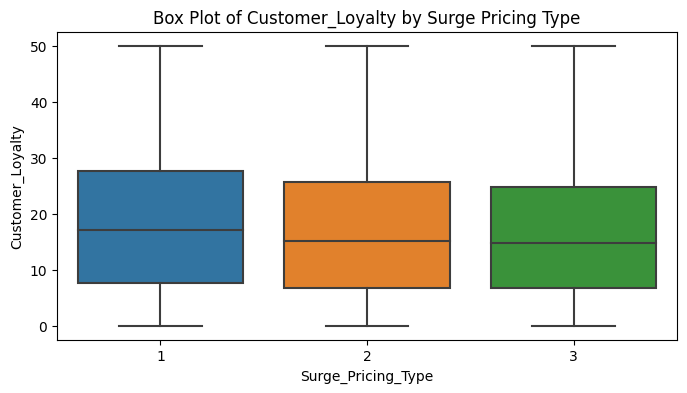

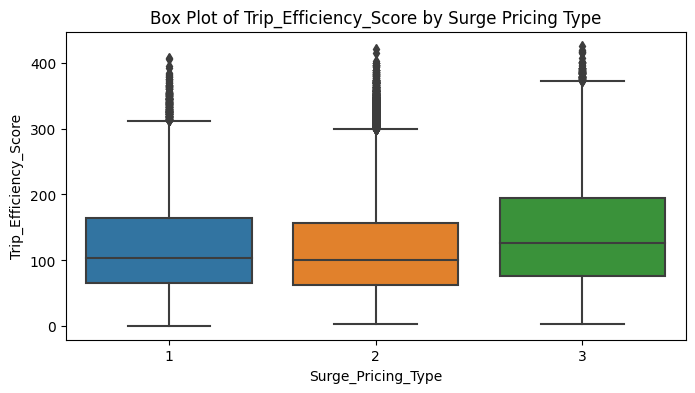

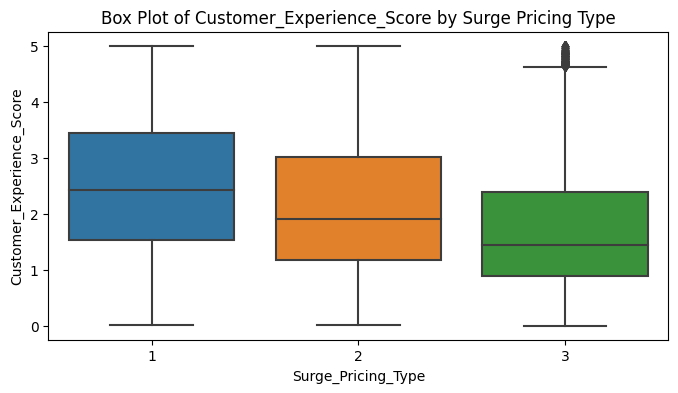

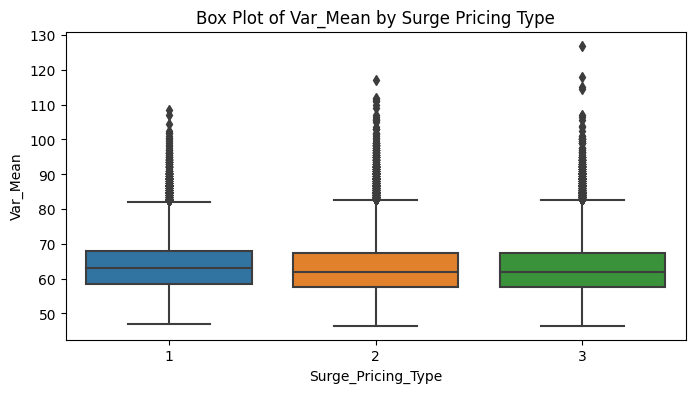

In [33]:
# Building boxplots
for feature in handcrafted_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Surge_Pricing_Type', y=feature, data=X_train_df)
    plt.title(f"Box Plot of {feature} by Surge Pricing Type")
    plt.show()


In [34]:
X_train_df = X_train_df.drop('Surge_Pricing_Type', axis=1)
# Converting DataFrame back to numpy arrays for compatibility with SelectKBest
X_train_preprocessed = X_train_df.values
y_train_preprocessed = y_train

# Defining the mutual_info_classif with a fixed random_state using a lambda function
score_func = lambda X, y: mutual_info_classif(X, y, random_state=42)

# Applying SelectKBest with mutual_info_classif
mutual_info_selector = SelectKBest(score_func=score_func, k='all')
mutual_info_selector.fit(X_train_preprocessed, y_train_preprocessed)

# List containing the mutual information scores
feature_scores = mutual_info_selector.scores_

# Since one-hot encoding was applied before, the original feature names list needs to be updated to include the new column names.
updated_feature_names = X_train_df.columns

In [35]:
# List of tuples, where each tuple contains a pair of elements from updated_feature_names and feature_scores.
feature_scores_with_names = list(zip(updated_feature_names, feature_scores))

# Sort the features and their scores in descending order of score
sorted_features_with_scores = sorted(feature_scores_with_names, key=lambda x: x[1], reverse=True)

# Print the sorted list
for feature, score in sorted_features_with_scores:
    print(f"{feature}: {score}")

Type_of_Cab_A: 0.1225066000412447
Type_of_Cab_D: 0.07269500213514757
Type_of_Cab_B: 0.06365047745535035
Type_of_Cab_C: 0.040952655435102514
Customer_Experience_Score: 0.031843875544514066
Type_of_Cab_E: 0.026635920305597027
Cancellation_Last_1Month: 0.020625105303387237
Confidence_Life_Style_Index_A: 0.02013231767226653
Confidence_Life_Style_Index_B: 0.01748101560471893
Trip_Distance: 0.016995617203462654
Customer_Rating: 0.01584851853249236
Destination_Type_B: 0.015126951073598072
Destination_Type_A: 0.01338919117790427
Trip_Efficiency_Score: 0.012086592055551737
Life_Style_Index: 0.005997744880463118
Var_Mean: 0.005059344110040831
Customer_Since_Months: 0.005006091167437887
Gender_Male: 0.004625515253475987
Gender_Female: 0.004305967833923008
Customer_Loyalty: 0.004146751960661499
Confidence_Life_Style_Index_C: 0.004094357420359573
Var3: 0.0027616140808919276
Destination_Type_D: 0.002551485829893174
Destination_Type_L: 0.002185006662622113
Destination_Type_I: 0.002133534363874645
Des

In [36]:
X_train_df_filtered=X_train_df
X_test_df_filtered=X_test_df

In [37]:
bool_cols = X_train_df_filtered.select_dtypes(include=['bool']).columns.tolist()
# Convert boolean columns to uint8 in X_train_df_filtered
X_train_df_filtered.loc[:, bool_cols] = X_train_df_filtered.loc[:, bool_cols].astype('uint8')

# Convert boolean columns to uint8 in X_test_df_filtered
X_test_df_filtered.loc[:, bool_cols] = X_test_df_filtered.loc[:, bool_cols].astype('uint8')

In [38]:
X_train_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105329 entries, 0 to 105328
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  105329 non-null  float64
 1   Customer_Since_Months          105329 non-null  float64
 2   Life_Style_Index               105329 non-null  float64
 3   Customer_Rating                105329 non-null  float64
 4   Cancellation_Last_1Month       105329 non-null  int64  
 5   Var2                           105329 non-null  int64  
 6   Var3                           105329 non-null  int64  
 7   Type_of_Cab_A                  105329 non-null  uint8  
 8   Type_of_Cab_B                  105329 non-null  uint8  
 9   Type_of_Cab_C                  105329 non-null  uint8  
 10  Type_of_Cab_D                  105329 non-null  uint8  
 11  Type_of_Cab_E                  105329 non-null  uint8  
 12  Confidence_Life_Style_Index_A 

In [39]:
# List of continuous features to scale
continuous_features = X_train_df_filtered.select_dtypes(exclude=['uint8']).columns.tolist()

In [40]:
# Create copies of the filtered DataFrames to avoid SettingWithCopyWarning
X_train_df_filtered = X_train_df_filtered.copy()
X_test_df_filtered = X_test_df_filtered.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous features of the training data and transform the training data
X_train_df_filtered.loc[:, continuous_features] = scaler.fit_transform(X_train_df_filtered.loc[:, continuous_features])

# Transform the continuous features on the test data using the same scaler
X_test_df_filtered.loc[:, continuous_features] = scaler.transform(X_test_df_filtered.loc[:, continuous_features])

In [41]:
X_train_df_filtered.head(4)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male,Customer_Loyalty,Trip_Efficiency_Score,Customer_Experience_Score,Var_Mean
0,-0.346793,0.841597,-1.183346,-0.358674,-0.753644,-0.843952,-1.044498,0,0,0,...,0,0,0,0,0,1,0.458868,-0.460414,0.385793,-1.057257
1,0.622701,-1.696302,-0.770294,1.410591,0.208463,-1.044757,-1.044498,0,1,0,...,0,0,0,0,1,0,-1.413186,0.414967,0.056233,-1.122100
2,0.058568,1.123586,-0.140556,-0.012209,0.208463,-0.442343,-0.699266,0,1,0,...,0,0,0,0,0,1,0.950187,0.004707,-0.549225,-0.668198
3,-0.908182,-0.286358,-0.384400,-1.363678,1.170571,-0.040733,-0.181418,0,0,1,...,0,0,0,0,0,1,-0.784064,-0.884411,-1.342590,-0.149453


In [42]:
X_train_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105329 entries, 0 to 105328
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  105329 non-null  float64
 1   Customer_Since_Months          105329 non-null  float64
 2   Life_Style_Index               105329 non-null  float64
 3   Customer_Rating                105329 non-null  float64
 4   Cancellation_Last_1Month       105329 non-null  float64
 5   Var2                           105329 non-null  float64
 6   Var3                           105329 non-null  float64
 7   Type_of_Cab_A                  105329 non-null  uint8  
 8   Type_of_Cab_B                  105329 non-null  uint8  
 9   Type_of_Cab_C                  105329 non-null  uint8  
 10  Type_of_Cab_D                  105329 non-null  uint8  
 11  Type_of_Cab_E                  105329 non-null  uint8  
 12  Confidence_Life_Style_Index_A 

In [43]:
#Converting to numpy arrays for further steps
X_train_filtered = X_train_df_filtered.values
X_test_filtered = X_test_df_filtered.values

# Training


We are starting from a baseline

In [44]:
# Define the baseline model
baseline = DummyClassifier(strategy='most_frequent', random_state=random_seed)

# Measure time for fitting the model
start_time = time.time()
baseline.fit(X_train_filtered, y_train)
end_time = time.time()
fitting_time = end_time - start_time
pred_test = baseline.predict(X_test_filtered)


print(f"Time taken for fitting baseline model: {fitting_time} seconds")
test_accuracy = accuracy_score(y_test, pred_test)
print('Test accuracy:', test_accuracy)

Time taken for fitting baseline model: 0.002633810043334961 seconds
Test accuracy: 0.4308662134963734


In [45]:
est_confmtx = confusion_matrix(y_test, pred_test)

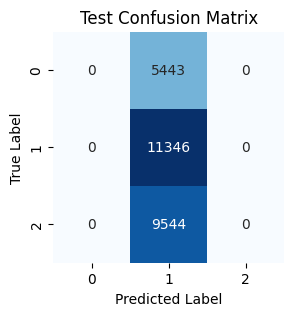

In [46]:
plt.figure(figsize=(4, 3))
sns.heatmap(est_confmtx, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

In [47]:
# Calculate metrics
report = classification_report(y_test, pred_test, zero_division=0)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5443
           2       0.43      1.00      0.60     11346
           3       0.00      0.00      0.00      9544

    accuracy                           0.43     26333
   macro avg       0.14      0.33      0.20     26333
weighted avg       0.19      0.43      0.26     26333



Improved models and Fine-Tuning

In [48]:
# Hyperparameter values for OneVsRestClassifier with LogisticRegression
param_dist_lr = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10],  # Extending range of regularization strengths
    'estimator__penalty': ['l2'],
    'estimator__max_iter': [100, 200, 400]  # Number of iterations
}

# Exact hyperparameter values for DecisionTreeClassifier
param_dist_dt = {
    'max_depth': [5, 10, 20, None],  # Added more granularity
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'min_impurity_decrease': [0.0, 0.01, 0.1]  # Minimum impurity decrease required for split
}
# Exact hyperparameter values for KNeighborsClassifier
param_dist_knn = {
    'n_neighbors': [1, 5, 10, 20, 25],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Initializing models with their hyperparameter spaces
models = {
    'OneVsRestClassifier_LogisticRegression': (OneVsRestClassifier(LogisticRegression(random_state=random_seed)), param_dist_lr),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=random_seed), param_dist_dt),
    'KNeighborsClassifier': (KNeighborsClassifier(), param_dist_knn)
}

# Function to run GridSearchCV
def run_grid_search(model, params, X_train, y_train):
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid=params, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return grid_search.best_estimator_, grid_search.best_params_, elapsed_time

# Running GridSearchCV for each model
best_estimators = {}

for model_name, (model, params) in models.items():
    print(f"Running GridSearchCV for {model_name}")
    best_model, best_params, elapsed_time = run_grid_search(model, params, X_train_filtered, y_train)
    best_estimators[model_name] = best_model
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Time(seconds) taken for {model_name}: {elapsed_time} seconds") # Overall time spent for every model with the different combinations of hyperparameters and etc.
    print("\n")


Running GridSearchCV for OneVsRestClassifier_LogisticRegression
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for OneVsRestClassifier_LogisticRegression: {'estimator__C': 0.001, 'estimator__max_iter': 100, 'estimator__penalty': 'l2'}
Time(seconds) taken for OneVsRestClassifier_LogisticRegression: 75.83205103874207 seconds


Running GridSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time(seconds) taken for DecisionTreeClassifier: 232.16563057899475 seconds


Running GridSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 25, 'weights': 'distance'}
Time(seconds) taken for KNeighborsClassifier: 200.94906091690063 seconds




In [49]:
# Evaluating `best_estimators` on the test set
for model_name, model in best_estimators.items():
    pred_test = model.predict(X_test_filtered)
    pred_train = model.predict(X_train_filtered)
    train_acc = accuracy_score(y_train, pred_train)
    print(f"Training accuracy of {model_name} - {train_acc}")
    print(f"Evaluation of {model_name} on test set:")
    pred_test = model.predict(X_test_filtered)
    accuracy= accuracy_score(y_test, pred_test)
    print(accuracy)
    print(classification_report(y_test, pred_test))
    print("\n")

Training accuracy of OneVsRestClassifier_LogisticRegression - 0.6816736131549715
Evaluation of OneVsRestClassifier_LogisticRegression on test set:
0.6778187065659059
              precision    recall  f1-score   support

           1       0.75      0.52      0.62      5443
           2       0.63      0.83      0.72     11346
           3       0.73      0.59      0.65      9544

    accuracy                           0.68     26333
   macro avg       0.70      0.65      0.66     26333
weighted avg       0.69      0.68      0.67     26333



Training accuracy of DecisionTreeClassifier - 0.6787209600394953
Evaluation of DecisionTreeClassifier on test set:
0.6743629666198306
              precision    recall  f1-score   support

           1       0.77      0.48      0.59      5443
           2       0.63      0.87      0.73     11346
           3       0.73      0.56      0.63      9544

    accuracy                           0.67     26333
   macro avg       0.71      0.63      0.65  

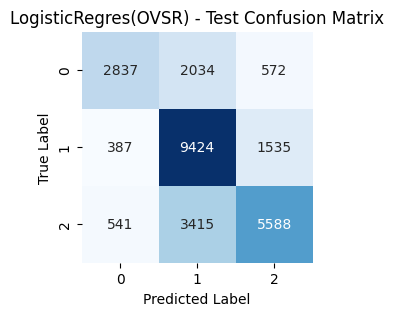

Fitting time for OneVsRestClassifier_LogisticRegression: 1.5624809265136719 seconds




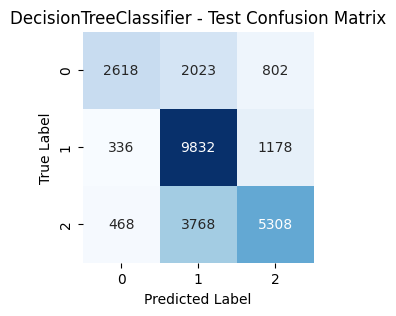

Fitting time for DecisionTreeClassifie: 0.6228156089782715 seconds




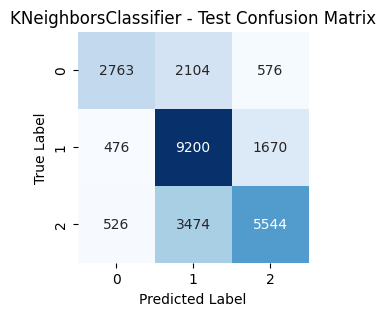

Fitting time for KNeighborsClassifier: 0.01698899269104004 seconds


In [50]:
# Defining functions to run each model with the best parameters and plot confusion matrix
def run_OneVsRestClassifier_LogisticRegression(best_params, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = OneVsRestClassifier(LogisticRegression(**best_params,random_state=random_seed))
    model.fit(X_train, y_train)
    end_time = time.time()
    fitting_time = end_time - start_time

    # Generate confusion matrix
    pred_test = model.predict(X_test)
    est_confmtx = confusion_matrix(y_test, pred_test)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(est_confmtx, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('LogisticRegres(OVSR) - Test Confusion Matrix')
    plt.show()
    print(f"Fitting time for OneVsRestClassifier_LogisticRegression: {fitting_time} seconds")


def run_DecisionTreeClassifier(best_params, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = DecisionTreeClassifier(**best_params,random_state=random_seed)
    model.fit(X_train, y_train)
    end_time = time.time()
    fitting_time = end_time - start_time

    # Generate confusion matrix
    pred_test = model.predict(X_test)
    est_confmtx = confusion_matrix(y_test, pred_test)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(est_confmtx, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('DecisionTreeClassifier - Test Confusion Matrix')
    plt.show()
    print(f"Fitting time for DecisionTreeClassifie: {fitting_time} seconds")

def run_KNeighborsClassifier(best_params, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = KNeighborsClassifier(**best_params)
    model.fit(X_train, y_train)
    end_time = time.time()
    fitting_time = end_time - start_time

    # Generate confusion matrix
    pred_test = model.predict(X_test)
    est_confmtx = confusion_matrix(y_test, pred_test)

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(est_confmtx, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('KNeighborsClassifier - Test Confusion Matrix')
    plt.show()
    print(f"Fitting time for KNeighborsClassifier: {fitting_time} seconds")

# Run each model with the best parameters and measure the fitting time
fitting_time_lr = run_OneVsRestClassifier_LogisticRegression({'C': 0.001, 'penalty': 'l2', 'max_iter': 100}, X_train_filtered, y_train, X_test_filtered, y_test)
print("\n")

fitting_time_dt = run_DecisionTreeClassifier({'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_depth': 5, 'criterion': 'entropy'}, X_train_filtered, y_train, X_test_filtered, y_test)
print("\n")

fitting_time_knn = run_KNeighborsClassifier({'weights': 'distance', 'n_neighbors': 25}, X_train_filtered, y_train, X_test_filtered, y_test)


In [51]:
model1 = OneVsRestClassifier(LogisticRegression(C=0.001, penalty='l2', max_iter=100, random_state=random_seed))
model1.fit(X_train_filtered, y_train)
pred_test1 = model1.predict(X_test_filtered)
accuracy_bm= accuracy_score(y_test, pred_test1)
print(f'Accuracy of the best model so far - {accuracy_bm}')

Accuracy of the best model so far - 0.6778187065659059


Improving by using Voting Classifier

In [52]:
# Define the classifiers
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=random_seed))
dt_clf = DecisionTreeClassifier(random_state=random_seed)
knn_clf = KNeighborsClassifier()

# Define the Voting Classifier with dynamic voting
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf), ('knn', knn_clf)], voting='hard')

# Set up parameter grid for RandomizedSearchCV
params = {
    'lr__estimator__C': [0.01, 0.1, 1, 10],
    'lr__estimator__max_iter': [300, 600, 900],
    'dt__max_depth': [5, 10, 20, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy'],
    'dt__min_impurity_decrease': [0.0, 0.01, 0.1],
    'knn__n_neighbors': [1, 5, 10, 20, 25],
    'knn__weights': ['uniform', 'distance']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=params, n_iter=50, cv=5, scoring='accuracy', verbose=1, random_state=random_seed, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_filtered, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test_filtered, y_test)
print('Voting classifier accuracy on the test set:', test_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'lr__estimator__max_iter': 300, 'lr__estimator__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 20, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 2, 'dt__min_impurity_decrease': 0.0, 'dt__max_depth': 10, 'dt__criterion': 'gini'}
Best score: 0.6840566326544525
Voting classifier accuracy on the test set: 0.6796794896137925


Improving by using NN

In [53]:
keras.utils.set_random_seed(random_seed) # for reproducability
tensorflow.config.experimental.enable_op_determinism() # for reproducability

X_train_filtered, X_val, y_train, y_val = train_test_split(X_train_filtered, y_train, test_size=1/6, stratify=y_train, random_state=random_seed)
print('Train set shape', X_train_filtered.shape)
print('Validation set shape', X_val.shape)
print('Test set shape', X_test_filtered.shape)

Train set shape (87774, 35)
Validation set shape (17555, 35)
Test set shape (26333, 35)


In [54]:
# model creation
model = Sequential([
    Dense(32, input_shape=(35,)),
    BatchNormalization(),
    Activation('relu'),
    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

I0000 00:00:1764467471.371473   10517 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764467471.372037   10517 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,067 (8.07 KB)

 Trainable params: 1,955 (7.64 KB)

 Non-trainable params: 112 (448.00 B)

In [56]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.05),
              metrics=['accuracy'])

In [57]:
# It is better to have 0,1,2 instead of 1,2,3 since it causes problems during one-hot encoding
y_train = np.array(y_train) - 1
y_val = np.array(y_val) - 1
y_test = np.array(y_test) - 1


y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=3)
y_val_one_hot = keras.utils.to_categorical(y_val, num_classes=3)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=3)

In [58]:
# training
model.fit(X_train_filtered, y_train_one_hot, epochs=30, batch_size=256, validation_data=(X_val, y_val_one_hot))

Epoch 1/30


2025-11-30 01:51:12.245512: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5135 - loss: 0.9902 - val_accuracy: 0.6665 - val_loss: 0.7945
Epoch 2/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6706 - loss: 0.7873 - val_accuracy: 0.6793 - val_loss: 0.7653
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6782 - loss: 0.7671 - val_accuracy: 0.6828 - val_loss: 0.7561
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6809 - loss: 0.7588 - val_accuracy: 0.6832 - val_loss: 0.7511
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6832 - loss: 0.7539 - val_accuracy: 0.6851 - val_loss: 0.7475
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6843 - loss: 0.7504 - val_accuracy: 0.6865 - val_loss: 0.7450
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6843 - loss: 0.7479 - val_accuracy: 0.6869 - val_loss: 0.7430
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6849 - loss: 0.7460 - val_accuracy: 0.6869 - val_

In [59]:
# evaluation
loss_and_metrics = model.evaluate(X_test_filtered, y_test_one_hot, batch_size=2048)
print('Loss:', loss_and_metrics[0])
print('Accuracy:', loss_and_metrics[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6809 - loss: 0.7509 
Loss: 0.7465870380401611
Accuracy: 0.6832112073898315


2025-11-30 01:52:02.974299: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


In [60]:
def create_model(optimizer='sgd', learning_rate=0.01, batch_size=256):
    if optimizer == 'sgd':
        opt = optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = optimizers.Adagrad(learning_rate=learning_rate)

    model = Sequential([
        Dense(32, input_shape=(35,)),
        BatchNormalization(),
        Activation('relu'),
        Dense(16),
        BatchNormalization(),
        Activation('relu'),
        Dense(8),
        BatchNormalization(),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

params = {
    'optimizer': ['sgd', 'adam', 'adagrad'],
    'learning_rate': [0.01, 0.05, 0.1],
    'batch_size': [128, 256, 512]
}

best_score = 0 # to track best validation accuracy
best_params = {}
best_training_accuracy = 0  # to track best training accuracy

for combo in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combo))
    model = create_model(**param_dict)

    # Train the model
    history = model.fit(X_train_filtered, y_train_one_hot, epochs=30, batch_size=param_dict['batch_size'], verbose=0)

    # Get training accuracy from the last epoch
    training_accuracy = history.history['accuracy'][-1]

    # Validate the model
    loss, validation_accuracy = model.evaluate(X_val, y_val_one_hot, verbose=0)

    # Output training and validation results
    print(f"Params: {param_dict} - Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}")

    # Check if the current model's validation accuracy is better
    if validation_accuracy > best_score:
        best_score = validation_accuracy # update the best validation accuracy
        best_params = param_dict
        best_training_accuracy = training_accuracy  # update the best training accuracy

# Output the best results found
print(f"Best Validation Score: {best_score}")
print(f"Best Training Accuracy: {best_training_accuracy}")
print(f"Best Params: {best_params}")

2025-11-30 01:53:23.994302: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.01, 'batch_size': 128} - Training Accuracy: 0.6857611536979675, Validation Accuracy: 0.6887496709823608


2025-11-30 01:54:07.662678: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.01, 'batch_size': 256} - Training Accuracy: 0.6853168606758118, Validation Accuracy: 0.6865280270576477


2025-11-30 01:54:31.905543: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.01, 'batch_size': 512} - Training Accuracy: 0.6844737529754639, Validation Accuracy: 0.6869267821311951


2025-11-30 01:55:53.722394: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.05, 'batch_size': 128} - Training Accuracy: 0.6896917223930359, Validation Accuracy: 0.6881800293922424


2025-11-30 01:56:36.692729: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.05, 'batch_size': 256} - Training Accuracy: 0.6876409649848938, Validation Accuracy: 0.6890914440155029


2025-11-30 01:57:00.044596: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.05, 'batch_size': 512} - Training Accuracy: 0.6875612139701843, Validation Accuracy: 0.6899458765983582


2025-11-30 01:58:21.298827: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.1, 'batch_size': 128} - Training Accuracy: 0.6891448497772217, Validation Accuracy: 0.6892053484916687


2025-11-30 01:59:04.472670: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.1, 'batch_size': 256} - Training Accuracy: 0.6883929371833801, Validation Accuracy: 0.6900028586387634


2025-11-30 01:59:27.629711: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'sgd', 'learning_rate': 0.1, 'batch_size': 512} - Training Accuracy: 0.6889397501945496, Validation Accuracy: 0.6881230473518372


2025-11-30 02:01:26.867715: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.01, 'batch_size': 128} - Training Accuracy: 0.6909107565879822, Validation Accuracy: 0.6896610856056213


2025-11-30 02:02:29.287048: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.01, 'batch_size': 256} - Training Accuracy: 0.6910360455513, Validation Accuracy: 0.6845912933349609


2025-11-30 02:03:03.832376: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.01, 'batch_size': 512} - Training Accuracy: 0.6908765435218811, Validation Accuracy: 0.6868698596954346


2025-11-30 02:05:02.726735: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.05, 'batch_size': 128} - Training Accuracy: 0.686695396900177, Validation Accuracy: 0.6866989731788635


2025-11-30 02:06:05.541626: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.05, 'batch_size': 256} - Training Accuracy: 0.6877776980400085, Validation Accuracy: 0.6901737451553345


2025-11-30 02:06:39.028514: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.05, 'batch_size': 512} - Training Accuracy: 0.6897486448287964, Validation Accuracy: 0.6848760843276978


2025-11-30 02:08:37.522175: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.1, 'batch_size': 128} - Training Accuracy: 0.6857156157493591, Validation Accuracy: 0.6918256878852844


2025-11-30 02:09:40.173964: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.1, 'batch_size': 256} - Training Accuracy: 0.6856016516685486, Validation Accuracy: 0.6896041035652161


2025-11-30 02:10:13.290152: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adam', 'learning_rate': 0.1, 'batch_size': 512} - Training Accuracy: 0.6885638236999512, Validation Accuracy: 0.6894901990890503


2025-11-30 02:11:46.157033: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.01, 'batch_size': 128} - Training Accuracy: 0.6862624287605286, Validation Accuracy: 0.6895471215248108


2025-11-30 02:12:35.380568: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.01, 'batch_size': 256} - Training Accuracy: 0.6860801577568054, Validation Accuracy: 0.6897749900817871


2025-11-30 02:13:02.087807: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.01, 'batch_size': 512} - Training Accuracy: 0.6859206557273865, Validation Accuracy: 0.6866419911384583


2025-11-30 02:14:35.109655: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.05, 'batch_size': 128} - Training Accuracy: 0.6898170113563538, Validation Accuracy: 0.6909712553024292


2025-11-30 02:15:23.708114: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.05, 'batch_size': 256} - Training Accuracy: 0.6906145215034485, Validation Accuracy: 0.6873255372047424


2025-11-30 02:15:50.215338: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.05, 'batch_size': 512} - Training Accuracy: 0.6893043518066406, Validation Accuracy: 0.6905155181884766


2025-11-30 02:17:22.656994: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.1, 'batch_size': 128} - Training Accuracy: 0.6905120015144348, Validation Accuracy: 0.6866419911384583


2025-11-30 02:18:11.270430: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.1, 'batch_size': 256} - Training Accuracy: 0.6906031370162964, Validation Accuracy: 0.6873825192451477


2025-11-30 02:18:37.792866: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


Params: {'optimizer': 'adagrad', 'learning_rate': 0.1, 'batch_size': 512} - Training Accuracy: 0.6911613941192627, Validation Accuracy: 0.6888065934181213
Best Validation Score: 0.6918256878852844
Best Training Accuracy: 0.6857156157493591
Best Params: {'optimizer': 'adam', 'learning_rate': 0.1, 'batch_size': 128}


In [61]:
# Evaluate the model on the test set
loss, test_accuracy = model.evaluate(X_test_filtered, y_test_one_hot, batch_size=2048, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {test_accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.7505 
Test Loss: 0.7456041574478149
Test Accuracy: 0.683476984500885


The best score is **68.34** in the Test dataset by using NN. The model achieved the **top** perfomance on the Kaggle dataset.